🎯 주요 목표
품질 진단 결과에 대한 통계적 요약

불량/경계 샘플에 대한 추출 및 시각화

평균 온도, 편차, 등급별 요약 등 KPI 생성

최종 리포트용 CSV 저장 또는 정리

🔹 1단계: 진단 결과 불러오기

In [21]:
import pandas as pd
import matplotlib as mpl
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
plt.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("quality_diagnosis_result.csv")
df.head()


,id,thickness,deviation,grade,label
0,0,1.58,0.08,C,C_NG
1,1,1.59,0.09,C,C_NG
2,2,1.60,0.10,C,C_NG
3,3,1.70,0.20,C,C_NG
4,4,1.72,0.22,C,C_NG


🔹 2단계: 전체 품질 등급 요약 (기준 통과율)

In [26]:
label_summary = df["label"].value_counts().reset_index()
label_summary.columns = ["Label", "Count"]

ok_ratio = df["label"].str.endswith("OK").mean() * 100
print(f"기준 통과율: {ok_ratio:.2f}%")
label_summary

기준 통과율: 68.36%


,Label,Count
0,A_OK,283
1,C_NG,97
2,B_NG,24
3,A_NG,10


🔹 3단계: 등급별 평균 두께 및 편차 정리

In [27]:
grade_summary = df.groupby("grade")[["thickness", "deviation"]].agg(["mean", "std", "count"])
grade_summary

thickness                 deviation                
           mean       std count      mean       std count
grade                                                    
A      1.058635  0.155030   293  0.000000  0.000000   293
B      1.025000  0.360410    24  0.024167  0.010598    24
C      1.692680  0.457868    97  0.330619  0.197852    97

🔹 4단계: 경계 샘플 추출 (0.80.85mm, 1.451.5mm)

In [28]:
border_samples= df[((df["thickness"]>= 0.8) & (df["thickness"] <= 0.85 )) |
    ((df["thickness"] >= 1.45) & ( df["thickness"] <= 1.5))
    ]. sort_values("thickness")

border_samples[[ "id", "thickness", "grade", "label"]].head()

,id,thickness,grade,label
69,69,0.8,A,A_NG
279,279,0.8,A,A_NG
277,277,0.8,A,A_NG
275,275,0.8,A,A_NG
271,271,0.8,A,A_NG


🔹 5단계: 오분류 또는 이상 샘플 시각화

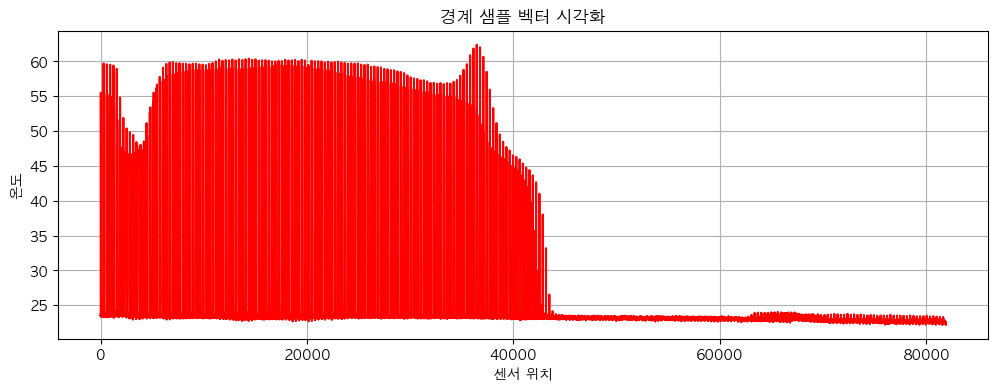

In [35]:
sample_id = border_samples.iloc[0]["id"]
vector = pd.read_csv("../raw_data/left_data.csv", header=None).iloc[int(sample_id)]

plt.figure(figsize=(12,4))
plt.plot(vector, color = "red")
plt.title(f"경계 샘플 벡터 시각화")
plt.xlabel("센서 위치")
plt.ylabel("온도")
plt.grid(True)
plt.show()


🔹 6단계: 리포트 저장

In [36]:
df.to_csv("final_quality_report_v2.csv", index=False)
print("최종 품질 리포트 저장완료.")

최종 품질 리포트 저장완료.
